<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brandon Thimmesch

IMSE 541 - Lab 4

3 October 2022

In [ ]:
# importing libraries
import math
import random
import scipy
import statistics
from statistics import mean
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt

# model packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ex 13.4
A process engineer is trying to improve the life of a
cutting tool. He has run a 2^3 experiment using cutting
speed (A), metal hardness (B), and cutting angle (C)
as the factors. The data from two replicates are
shown in Table 13E.2.
(a) Do any of the three factors affect tool life?
(b) What combination of factor levels produces the
longest tool life?
(c) Is there a combination of cutting speed and cutting angle that always gives good results regardless of metal hardness?

In [ ]:
# Ex 13.4 - reading in data
data134 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab4_Data_13.4.csv', sep=',', na_values=".")
data134

,a,b,c,Tool_Life
0,-1,-1,-1,221
1,1,-1,-1,325
2,-1,1,-1,354
3,1,1,-1,552
4,-1,-1,1,440
5,1,-1,1,406
6,-1,1,1,605
7,1,1,1,392
8,-1,-1,-1,311
9,1,-1,-1,435


In [ ]:
# To generate anova table using the ols model from statsmodel
# generate ANOVA table
# we use ordinary least square method for full factorial

# anova table
model_134 = ols('Tool_Life ~ C(a) + C(b) + C(c) + C(a):C(c)', data=data134).fit()
aov_table_134 = sm.stats.anova_lm(model_134, typ=2)
aov_table_134

,sum_sq,df,F,PR(>F)
C(a),1332.25,1.0,0.535065,0.479779
C(b),28392.25,1.0,11.403030,0.006177
C(c),20592.25,1.0,8.270357,0.015084
C(a):C(c),56882.25,1.0,22.845320,0.000572
Residual,27388.75,11.0,NaN,NaN


In [ ]:
#convert the dataframe column into numpy for computation
aa = data134[['a']].to_numpy()
bb = data134[['b']].to_numpy()
cc = data134[['c']].to_numpy()

#create the AB interaction column
AB = aa*bb

# attached the AB column into the dataframe data134
data134['AB'] = AB

In [ ]:
#create the AC interaction column
AC = aa*cc

# attached the AC column into the dataframe data134
data134['AC'] = AC

In [ ]:
#create the BC interaction column
BC = bb*cc

# attached the BC column into the dataframe data134
data134['BC'] = BC

In [ ]:
#create the ABC interaction column
ABC = aa*bb*cc

# attached the ABC column into the dataframe data134
data134['ABC'] = ABC

In [ ]:
# add a column of 1s into the X matrix
# X is the design matrix
X = data134[['a','b','c','AB','AC','BC','ABC']]
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,AB,AC,BC,ABC
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [ ]:
Y = data134[['Tool_Life']]
Y

,Tool_Life
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392
8,311
9,435


In [ ]:
# regression model
model = sm.OLS(Y, X)
res134 = model.fit()
print(res134.summary())

                            OLS Regression Results                            
Dep. Variable:              Tool_Life   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00790
Time:                        04:55:26   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Ex 13.4 (a)
Factor B (metal hardness) and factor C (cutting angle) affect tool life as they both yield p-values less than 0.1. Interaction between factor A (cutting speed) and factor C (cutting angle) also affects tool life as it has a very small p-value, much less than 0.1.

# Ex 13.4 (b)
The interaction between factor B (metal hardness) and factor C (cutting angle) produce the longest tool life.


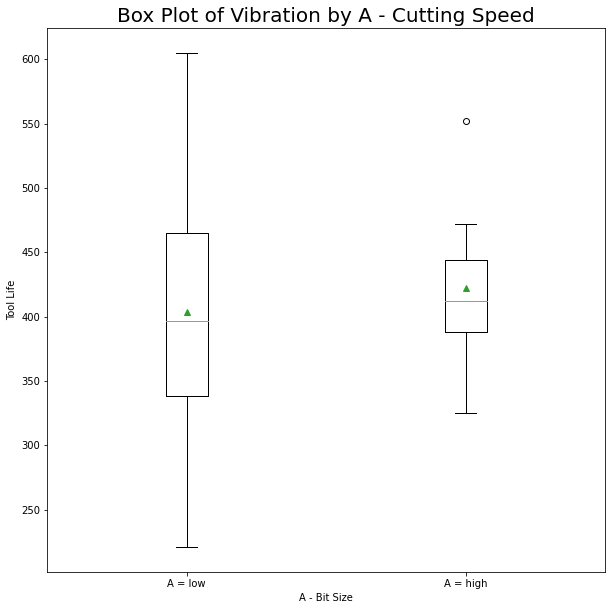

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - Cutting Speed", fontsize= 20)
ax.set

data_A = [data134['Tool_Life'][data134['a'] == -1],
             data134['Tool_Life'][data134['a'] == 1]]


ax.boxplot(data_A,
           labels= ['A = low', 'A = high'],
           showmeans= True)

plt.xlabel("A - Bit Size")
plt.ylabel("Tool Life")

plt.show()

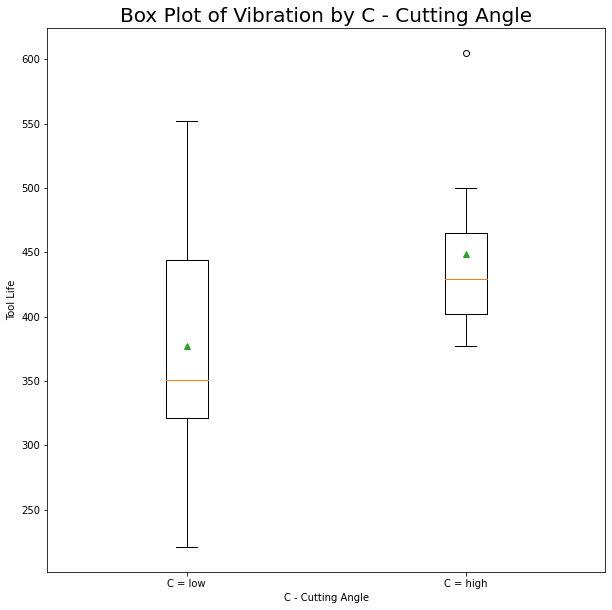

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by C - Cutting Angle", fontsize= 20)
ax.set

data_C = [data134['Tool_Life'][data134['c'] == -1],
             data134['Tool_Life'][data134['c'] == 1]]


ax.boxplot(data_C,
           labels= ['C = low', 'C = high'],
           showmeans= True)

plt.xlabel("C - Cutting Angle")
plt.ylabel("Tool Life")

plt.show()

# Ex 13.4 (c)
Low levels of cutting speed (Factor A) and high levels of cutting angle (Factor C) yield the longest tool life regardless of metal hardness (Factor B).

# Ex 13.6
Four factors are thought to possibly influence the
taste of a soft-drink beverage: type of sweetener (A),
ratio of syrup to water (B), carbonation level (C),
and temperature (D). Each factor can be run at two
levels, producing a 24 design. At each run in the
design, samples of the beverage are given to a test
panel consisting of 20 people. Each tester assigns a
point score from 1 to 10 to the beverage. Total score
is the response variable, and the objective is to find
a formulation that maximizes total score. Two replicates of this design are run, and the results are
shown in Table 13E.3. Analyze the data and draw
conclusions.

In [ ]:
# Ex 13.6 - reading in data
data136 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab4_Data_13.6.csv', sep=',', na_values=".")
data136

,a,b,c,d,Taste
0,-1,-1,-1,-1,188
1,1,-1,-1,-1,172
2,-1,1,-1,-1,179
3,1,1,-1,-1,185
4,-1,-1,1,-1,175
5,1,-1,1,-1,183
6,-1,1,1,-1,190
7,1,1,1,-1,175
8,-1,-1,-1,1,200
9,1,-1,-1,1,170


In [ ]:
# anova table
model_136 = ols('Taste ~ C(a) + C(b) + C(c) + C(d) + C(a):C(d)', data=data136).fit()
aov_table_136 = sm.stats.anova_lm(model_136, typ=2)
aov_table_136

,sum_sq,df,F,PR(>F)
C(a),657.03125,1.0,15.867925,0.000488
C(b),13.78125,1.0,0.332830,0.568959
C(c),57.78125,1.0,1.395472,0.248176
C(d),124.03125,1.0,2.995472,0.095351
C(a):C(d),38.28125,1.0,0.924528,0.345146
Residual,1076.56250,26.0,NaN,NaN


In [ ]:
#convert the dataframe column into numpy for computation
aa = data136[['a']].to_numpy()
bb = data136[['b']].to_numpy()
cc = data136[['c']].to_numpy()
dd = data136[['d']].to_numpy()

#create the AB interaction column
AB = aa*bb

# attached the AB column into the dataframe data136
data136['AB'] = AB

In [ ]:
#create the AC interaction column
AC = aa*cc

# attached the AC column into the dataframe data136
data136['AC'] = AC

In [ ]:
#create the AD interaction column
AD = aa*dd

# attached the AD column into the dataframe data136
data136['AD'] = AD

In [ ]:
#create the BC interaction column
BC = bb*cc

# attached the BC column into the dataframe data136
data136['BC'] = BC

In [ ]:
#create the BD interaction column
BD = bb*dd

# attached the BD column into the dataframe data136
data136['BD'] = BD

In [ ]:
#create the CD interaction column
CD = cc*dd

# attached the CD column into the dataframe data136
data136['CD'] = CD

In [ ]:
#create the ABC interaction column
ABC = aa*bb*cc

# attached the ABC column into the dataframe data136
data136['ABC'] = ABC

In [ ]:
#create the ABD interaction column
ABD = aa*bb*dd

# attached the ABD column into the dataframe data136
data136['ABD'] = ABD

In [ ]:
#create the BCD interaction column
BCD = bb*cc*dd

# attached the BCD column into the dataframe data136
data136['BCD'] = BCD

In [ ]:
#create the ABCD interaction column
ABCD = aa*bb*cc*dd

# attached the ABCD column into the dataframe data136
data136['ABCD'] = ABCD

In [ ]:
# add a column of 1s into the X matrix
# X is the design matrix
X = data136[['a','b','c','d','AB','AC','AD','BC','BD','CD','ABC','BCD','ABD','ABCD']]
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,d,AB,AC,AD,BC,BD,CD,ABC,BCD,ABD,ABCD
0,1.0,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,1
1,1.0,1,-1,-1,-1,-1,-1,-1,1,1,1,1,-1,1,-1
2,1.0,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1
3,1.0,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1
4,1.0,-1,-1,1,-1,1,-1,1,-1,1,-1,1,1,-1,-1
5,1.0,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,1
6,1.0,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1
7,1.0,1,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,-1
9,1.0,1,-1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,1


In [ ]:
Y = data136[['Taste']]
Y

,Taste
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [ ]:
# regression model
model2_136 = sm.OLS(Y, X)
res2_136=model2_136.fit()
print(res2_136.summary())

                            OLS Regression Results                            
Dep. Variable:                  Taste   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3.874
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00480
Time:                        04:55:56   Log-Likelihood:                -88.382
No. Observations:                  32   AIC:                             206.8
Df Residuals:                      17   BIC:                             228.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7813      0.929    196.743      0.0

# Ex 13.6
Considering the anova table and regression results for the data provided in example 13.6, it is apparent that factor A (type of sweetener used) has the greatest impact on resulting taste as it has the largest coefficient magnitude. Factor B (ratio of syrup to water) and factor C (carbonation level) are also significant.

Interactions involving factor A (type of sweetener used) and factor B (ratio of syrup to water) have relatively significant effects on taste outcomes. Other significant interactions include: AB (type of sweetener used, ratio of syrup to water), ABC (type of sweetener used, ratio of syrup to water, carbonation level), and ABD (type of sweetener used, ratio of syrup to water, temperature) as they all have relatively large coefficient magnitudes and yield p-values less than 0.1.